<a href="https://colab.research.google.com/github/almeida-cma/TELEMEDICINA/blob/main/DIAG_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O código simula a coleta de sinais vitais de um paciente ao longo de um dia, e inclui a geração de dados aleatórios para várias medições de saúde. Aqui está um resumo do que está sendo simulado:

### 1. **Dados Simulados:**
   - **Frequência Cardíaca (bpm):** Simula a frequência cardíaca do paciente com uma média de 75 bpm e uma variação normal. Introduz anomalias como bradicardia (frequência abaixo de 60 bpm) e taquicardia (frequência acima de 100 bpm).
   - **Pressão Arterial (mmHg):** Simula a pressão arterial sistólica e diastólica com médias normais. Introduz anomalias como hipertensão (pressão alta) e hipotensão (pressão baixa).
   - **Temperatura Corporal (°C):** Simula a temperatura do paciente com uma média de 36.5°C. Introduz anomalias como febre (temperatura acima de 37.5°C) e hipotermia (temperatura abaixo de 36.0°C).
   - **Saturação de Oxigênio (%):** Simula a saturação de oxigênio com uma média de 98%. Introduz anomalias como hipoxemia (saturação abaixo de 95%).

### 2. **Análise Diagnóstica:**
   - **Frequência Cardíaca:** Detecta bradicardia ou taquicardia com base nas anomalias encontradas.
   - **Pressão Arterial:** Identifica possíveis episódios de hipertensão ou hipotensão.
   - **Temperatura Corporal:** Verifica se há sinais de febre ou hipotermia.
   - **Saturação de Oxigênio:** Detecta possíveis casos de hipoxemia.

### 3. **Visualização dos Dados:**
   - **Gráficos:** São gerados gráficos para cada sinal vital, mostrando as variações ao longo das 24 horas do dia. Limites normais e anomalias são destacados para facilitar a interpretação dos dados.

### 4. **Exportação dos Dados:**
   - **Excel:** Os dados simulados são exportados para uma planilha do Excel, permitindo uma análise mais detalhada fora do ambiente Python.

### 5. **Execução do Código:**
   - **Hora Atualizada:** Cada medição é registrada com uma hora específica ao longo do dia, facilitando a visualização das mudanças nas variáveis vitais.

Este código oferece uma maneira prática de visualizar e analisar sinais vitais simulados, com a capacidade de identificar possíveis problemas de saúde com base em dados gerados aleatoriamente.

Diagnóstico ao final do dia:
Taquicardia detectada em alguns momentos do dia.
Hipertensão detectada em alguns momentos do dia.
Hipotensão detectada em alguns momentos do dia.
Hipotermia leve detectada em alguns momentos do dia.
Possível hipoxemia detectada em alguns momentos do dia.
Dados exportados para dados_paciente.xlsx


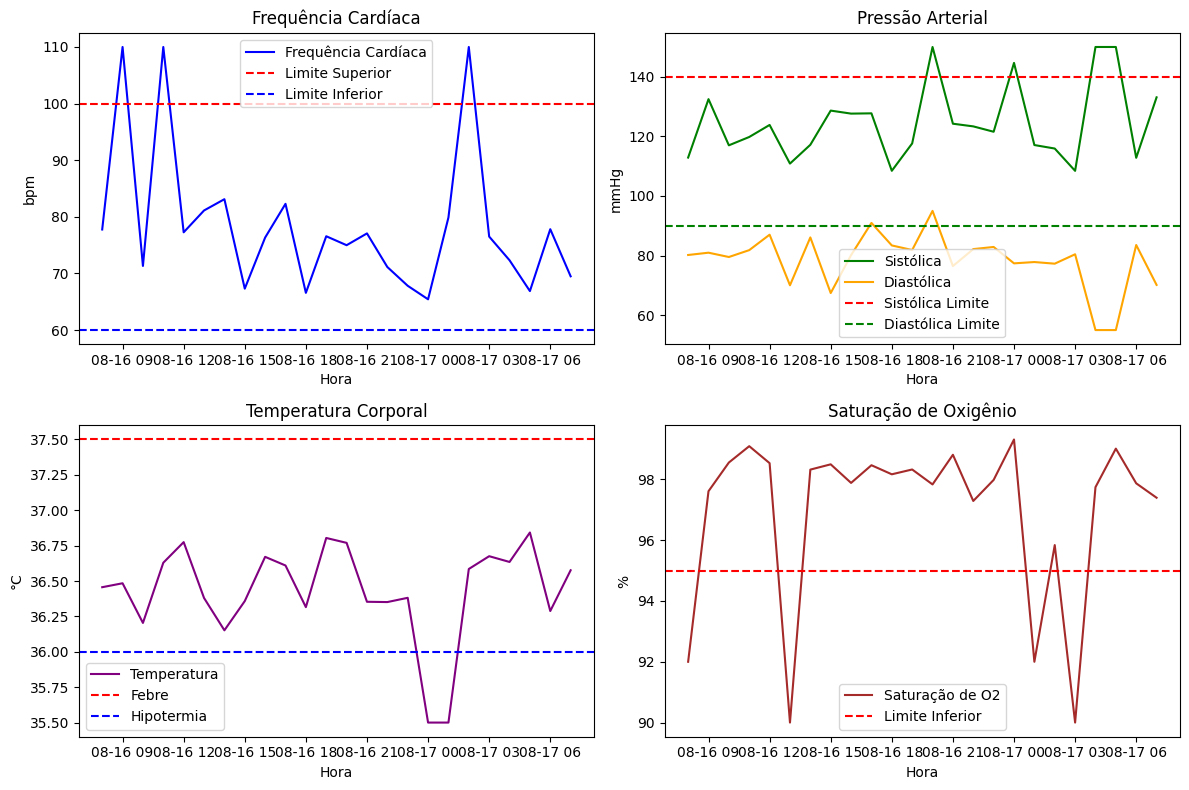

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Criar intervalo de 24 horas com uma medição por hora
horas = pd.date_range(start="08:00", periods=24, freq='H')

# Funções para simular sinais vitais com possíveis anomalias
def simular_freq_cardiaca():
    # Frequência cardíaca normal: 60-100 bpm
    valores_normais = np.random.normal(75, 5, size=len(horas))
    # Introduzindo anomalias aleatórias
    anomalias = np.random.choice([True, False], size=len(horas), p=[0.1, 0.9])
    valores_normais[anomalias] = np.random.choice([50, 110], size=sum(anomalias))  # Bradicardia ou Taquicardia
    return valores_normais

def simular_pressao_arterial():
    # Pressão arterial normal: Sistólica 90-120, Diastólica 60-80
    sistolica_normais = np.random.normal(120, 10, size=len(horas))
    diastolica_normais = np.random.normal(80, 5, size=len(horas))
    # Introduzindo anomalias aleatórias
    anomalias = np.random.choice([True, False], size=len(horas), p=[0.1, 0.9])
    sistolica_normais[anomalias] = np.random.choice([150, 85], size=sum(anomalias))  # Hipertensão ou Hipotensão
    diastolica_normais[anomalias] = np.random.choice([95, 55], size=sum(anomalias))
    return sistolica_normais, diastolica_normais

def simular_temperatura():
    # Temperatura corporal normal: 36.1°C a 37.2°C
    valores_normais = np.random.normal(36.5, 0.2, size=len(horas))
    # Introduzindo anomalias aleatórias
    anomalias = np.random.choice([True, False], size=len(horas), p=[0.1, 0.9])
    valores_normais[anomalias] = np.random.choice([38.0, 35.5], size=sum(anomalias))  # Febre ou Hipotermia
    return valores_normais

def simular_saturacao_oxigenio():
    # Saturação de oxigênio normal: 95% a 100%
    valores_normais = np.random.normal(98, 1, size=len(horas))
    # Introduzindo anomalias aleatórias
    anomalias = np.random.choice([True, False], size=len(horas), p=[0.1, 0.9])
    valores_normais[anomalias] = np.random.choice([92, 90], size=sum(anomalias))  # Hipoxemia
    return valores_normais

# Simulação dos sinais vitais
freq_cardiaca = simular_freq_cardiaca()
pressao_sistolica, pressao_diastolica = simular_pressao_arterial()
temperatura = simular_temperatura()
saturacao_oxigenio = simular_saturacao_oxigenio()

# Criação do DataFrame
dados = pd.DataFrame({
    "Hora": horas,
    "Frequência Cardíaca (bpm)": freq_cardiaca,
    "Pressão Sistólica (mmHg)": pressao_sistolica,
    "Pressão Diastólica (mmHg)": pressao_diastolica,
    "Temperatura (°C)": temperatura,
    "Saturação de Oxigênio (%)": saturacao_oxigenio
})

# Função para exportar dados para Excel
def exportar_para_excel(dados, nome_arquivo="dados_paciente.xlsx"):
    dados.to_excel(nome_arquivo, index=False)
    print(f"Dados exportados para {nome_arquivo}")

# Análise Diagnóstica
def diagnostico(dados):
    diagnostico_final = []

    # Verificar frequência cardíaca
    if np.any(dados["Frequência Cardíaca (bpm)"] < 60):
        diagnostico_final.append("Bradicardia detectada em alguns momentos do dia.")
    if np.any(dados["Frequência Cardíaca (bpm)"] > 100):
        diagnostico_final.append("Taquicardia detectada em alguns momentos do dia.")

    # Verificar pressão arterial
    if np.any(dados["Pressão Sistólica (mmHg)"] > 140) or np.any(dados["Pressão Diastólica (mmHg)"] > 90):
        diagnostico_final.append("Hipertensão detectada em alguns momentos do dia.")
    if np.any(dados["Pressão Sistólica (mmHg)"] < 90) or np.any(dados["Pressão Diastólica (mmHg)"] < 60):
        diagnostico_final.append("Hipotensão detectada em alguns momentos do dia.")

    # Verificar temperatura
    if np.any(dados["Temperatura (°C)"] > 37.5):
        diagnostico_final.append("Febre detectada em alguns momentos do dia.")
    if np.any(dados["Temperatura (°C)"] < 36.0):
        diagnostico_final.append("Hipotermia leve detectada em alguns momentos do dia.")

    # Verificar saturação de oxigênio
    if np.any(dados["Saturação de Oxigênio (%)"] < 95):
        diagnostico_final.append("Possível hipoxemia detectada em alguns momentos do dia.")

    if not diagnostico_final:
        diagnostico_final.append("Nenhuma anomalia significativa detectada.")

    return "\n".join(diagnostico_final)

# Relatório Diagnóstico
diagnostico_final = diagnostico(dados)
print("Diagnóstico ao final do dia:")
print(diagnostico_final)

# Exportar dados para Excel
exportar_para_excel(dados)

# Visualização dos Sinais Vitais
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(dados["Hora"], dados["Frequência Cardíaca (bpm)"], label="Frequência Cardíaca", color='blue')
plt.axhline(y=100, color='r', linestyle='--', label="Limite Superior")
plt.axhline(y=60, color='b', linestyle='--', label="Limite Inferior")
plt.title("Frequência Cardíaca")
plt.xlabel("Hora")
plt.ylabel("bpm")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(dados["Hora"], dados["Pressão Sistólica (mmHg)"], label="Sistólica", color='green')
plt.plot(dados["Hora"], dados["Pressão Diastólica (mmHg)"], label="Diastólica", color='orange')
plt.axhline(y=140, color='r', linestyle='--', label="Sistólica Limite")
plt.axhline(y=90, color='g', linestyle='--', label="Diastólica Limite")
plt.title("Pressão Arterial")
plt.xlabel("Hora")
plt.ylabel("mmHg")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(dados["Hora"], dados["Temperatura (°C)"], label="Temperatura", color='purple')
plt.axhline(y=37.5, color='r', linestyle='--', label="Febre")
plt.axhline(y=36.0, color='b', linestyle='--', label="Hipotermia")
plt.title("Temperatura Corporal")
plt.xlabel("Hora")
plt.ylabel("°C")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(dados["Hora"], dados["Saturação de Oxigênio (%)"], label="Saturação de O2", color='brown')
plt.axhline(y=95, color='r', linestyle='--', label="Limite Inferior")
plt.title("Saturação de Oxigênio")
plt.xlabel("Hora")
plt.ylabel("%")
plt.legend()

plt.tight_layout()
plt.show()
